In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import xarray as xr
from datetime import datetime, timedelta
from glob import glob
import sys
sys.path.append("/Odyssey/private/t22picar/tools")
from plot_tools import plot_uv_map, plot_map_zoom_only

In [17]:
time_target = "2012-01-21"
time_target = slice("2010-01-01","2019-01-01")

In [18]:
result_filepath = "/Odyssey/private/t22picar/data/ssh_L4/SSH_L4_CMEMS_2010-01-01-2024-01-01_4th.nc"
ssh_duacs = xr.open_dataset(result_filepath).sel(time=time_target)
#ssh_duacs

ssh_imt = "/Odyssey/public/UNET_rec_sla/4Dvar_unet_SSH_2010-01-01_2020-01-01_4th.nc"
ssh_imt = xr.open_dataset(ssh_imt).sel(time=time_target)
#ssh_imt

#plot_uv_map(ssh_imt.zos-ssh_duacs.zos,ssh_imt.lon,ssh_imt.lat,vmin=-.1,vmax=.1)

uv_imt = "/Odyssey/public/UNET_rec_sla/4Dvar_unet_uvgos_2010-01-01_2020-01-01_4th.nc"
uv_imt = xr.open_dataset(uv_imt).sel(time=time_target)
#plot_uv_map(uv_imt.ugos-ssh_duacs.ugos,ssh_imt.lon,ssh_imt.lat,vmin=-.1,vmax=.1)

In [19]:
diff_zos = np.nanmean((ssh_imt.zos.values - ssh_duacs.zos.values)**2,axis=(1,2))

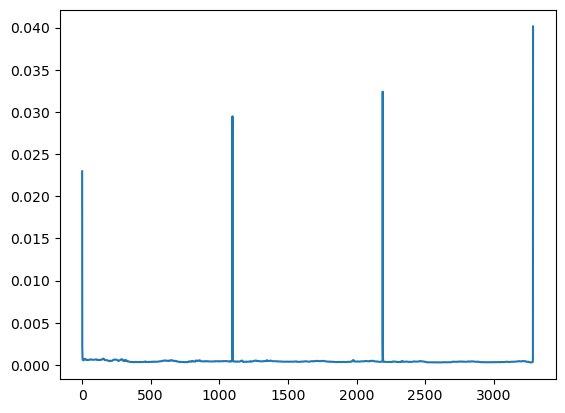

In [20]:
import matplotlib.pyplot as plt 
plt.plot(diff_zos)

In [21]:
diff_u = np.nanmean((uv_imt.ugos.values - ssh_duacs.ugos.values)**2,axis=(1,2))

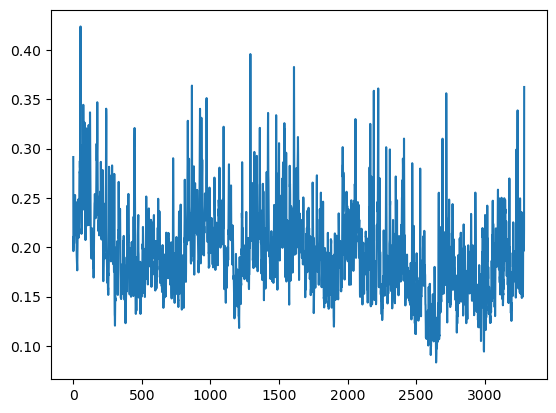

In [22]:
plt.plot(diff_u)